In [2]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd

In [6]:
alien_df = pd.read_csv('../project-1-alien-analysis/ufo_dates.csv') 
                      
#Suggested on Stackoverflow to establish datatypes at the beginning as parsing requires a lot of memory from Pandas                        
#                     dtype={"city": "string", "state": "string", 
#                                                                             "country": "string", "shape": "string", "duration (seconds)": int,
#                                                                            "latitude": int, "longitude": int, "Month": int,  "Day": int, 
#                                                                             "Time": int, "Year": int})

alien_df.head()

FileNotFoundError: [Errno 2] File ../project-1-alien-analysis/ufo_dates.csv does not exist: '../project-1-alien-analysis/ufo_dates.csv'

In [5]:
#Binning states into regions 

def label_states (row):
    if row['state'] in ['ct', 'me', 'nh', 'vt', 'ma', 'ri', 'ct', 'ny', 'pa', 'nj']:
        return 'North-East'
    if row['state'] in ['wi', 'mi', 'il', 'in', 'oh', 'nd', 'sd', 'ne', 'mn', 'ia', 'mo', 'ks']:
        return 'Midwest'
    if row['state'] in ['de', 'md', 'dc', 'va', 'wv', 'nc', 'sc', 'ga', 'fl', 'ky', 'tn', 'ms', 'al', 'ok', 'tx', 'ar', 'la']:
        return 'South'
    if row['state'] in ['wa', 'or', 'ca', 'nv', 'ut', 'az', 'nm', 'co', 'wy', 'id', 'mt', 'ak', 'hi']:
        return 'West'

region_df = pd.DataFrame([{'state':"al"}, {'state':"ak"}, {'state':"az"}, {'state':"ar"}, {'state':"ca"}, {'state':"co"}, 
                         {'state':"ct"}, {'state':"de"}, {'state':"dc"}, {'state':"fl"}, {'state':"ga"}, {'state':"hi"}, {'state':"id"},
                         {'state':"il"}, {'state':"in"}, {'state':"ia"}, {'state':"ks"}, {'state':"ky"}, {'state':"la"}, {'state':"me"},
                         {'state':"md"}, {'state':"ma"}, {'state':"mi"}, {'state':"mn"}, {'state':"ms"}, {'state':"mo"}, {'state':"mt"}, {'state':"ne"}, 
                          {'state':"nv"}, {'state':"nh"}, {'state':"nj"}, {'state':"nm"}, {'state':"ny"}, {'state':"nc"}, {'state':"nd"}, {'state':"oh"}, 
                         {'state':"ok"}, {'state':"or"}, {'state':"pa"}, {'state':"ri"}, {'state':"sc"}, {'state':"sd"}, {'state':"tn"}, {'state':"tx"}, {'state':"co"}, 
                         {'state':"vt"}, {'state':"va"}, {'state':"wa"}, {'state':"wv"}, {'state':"wi"}, {'state':"wy"}])

region_df['region'] = region_df.apply(lambda row: label_states(row), axis=1)

region_df

,state,region
0,al,South
1,ak,West
2,az,West
3,ar,South
4,ca,West
5,co,West
6,ct,North-East
7,de,South
8,dc,South
9,fl,South


In [27]:
#Join Regions DF with Aliens DF

alien_region = pd.merge(alien_df, region_df, on='state', how='right')
alien_region

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year,region
0,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993,Midwest
1,10/10/1998 13:15,elgin,il,us,cylinder,1800,30 +/- min,While looking up at sky I noticed a bright lig...,11/1/1998,42.037222,-88.281111,10,10,13:15,1998,Midwest
2,10/10/2004 15:00,rock island,il,us,sphere,3600,1 hour,The sky was clear and the objects at times ap...,10/27/2004,41.509444,-90.578611,10,10,15:00,2004,Midwest
3,10/10/2010 20:45,sterling,il,us,cylinder,600,10min,It had rows of white lights with red lights pu...,11/21/2010,41.788611,-89.696111,10,10,20:45,2010,Midwest
4,10/10/2012 20:30,marion,il,us,light,240,2 to 4 minutes,I was leaving my friend&#39s house to go home....,10/30/2012,37.730556,-88.933056,10,10,20:30,2012,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60316,6/15/2011 20:19,georgetown,dc,us,disk,6,6 seconds,metallic disk hovering silent in crowded airsp...,6/20/2011,38.904722,-77.062778,6,15,20:19,2011,South
60317,7/25/2012 21:30,washington,dc,us,changing,900,10-15 minutes,3 objects in 15 minutes&#44 2 balls of light m...,8/19/2012,38.895000,-77.036667,7,25,21:30,2012,South
60318,7/4/2012 21:06,washington,dc,us,sphere,5.5,5.5 seconds,Luminous spheres in flight&#44 then suddenly v...,8/5/2012,38.895000,-77.036667,7,4,21:06,2012,South
60319,8/28/2010 22:06,washington,dc,us,fireball,120.0,2 minutes,Red flaming object flying low over Washington ...,8/30/2010,38.895000,-77.036667,8,28,22:06,2010,South


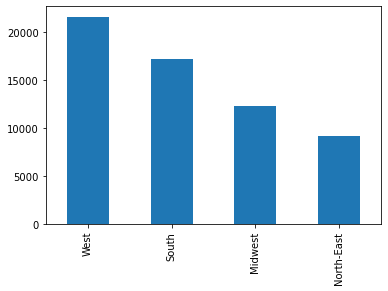

In [39]:
alien_region['region'].value_counts().plot.bar()



In [56]:
alien_region.to_csv(r'../project-1-alien-analysis\alien_region.csv')
